In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Set the path to your dataset
dataset_path = '/content/drive/My Drive/DATA/'

# List the directories in your dataset
categories = os.listdir(dataset_path)
print(categories)


['Recyclable', 'Non-Recyclable', 'Hazardous', 'Organic']


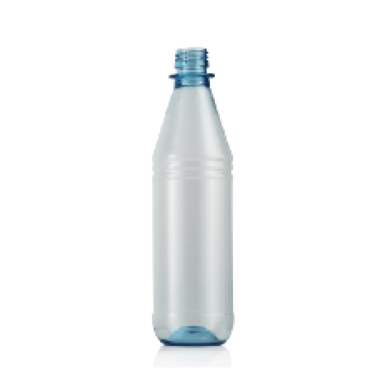

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Set the path to an image inside the "Recyclable" category
image_path = '/content/drive/My Drive/DATA/Recyclable/plastic_bottles/1.5.jpg'

# Load and resize the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))

# Convert the image to an array
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = image_array / 255.0  # Normalize the image

# Display the image
plt.imshow(image_array)
plt.axis('off')
plt.show()


In [ ]:
import os

# Base folder path
base_path = '/content/drive/My Drive/DATA'

# Categories to verify
categories = ['Recyclable', 'Organic', 'Hazardous', 'Non-Recyclable']

# Iterate through categories and list subfolders/files
for category in categories:
    category_path = os.path.join(base_path, category)
    print(f"Category: {category}")
    if os.path.exists(category_path):
        subfolders = os.listdir(category_path)
        for subfolder in subfolders:
            subfolder_path = os.path.join(category_path, subfolder)
            file_count = len(os.listdir(subfolder_path)) if os.path.isdir(subfolder_path) else 0
            print(f"  Subfolder: {subfolder} - {file_count} files")
    else:
        print(f"  Path not found: {category_path}")
    print("\n")


Category: Recyclable
  Subfolder: plastic_bottles - 109 files
  Subfolder: paper_products - 94 files
  Subfolder: glass_containers - 120 files
  Subfolder: cans_all_type - 219 files


Category: Organic
  Subfolder: coffee_tea_bags - 115 files
  Subfolder: food_scraps - 122 files
  Subfolder: kitchen_waste - 86 files
  Subfolder: egg_shells - 105 files
  Subfolder: yard_trimmings - 116 files


Category: Hazardous
  Subfolder: paints - 123 files
  Subfolder: e-waste - 464 files
  Subfolder: pesticides - 109 files
  Subfolder: batteries - 78 files


Category: Non-Recyclable
  Subfolder: sanitary_napkin - 88 files
  Subfolder: ceramic_product - 121 files
  Subfolder: platics_bags_wrappers - 113 files
  Subfolder: stroform_product - 97 files
  Subfolder: diapers - 118 files




In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset base directory
base_dir = '/content/drive/My Drive/DATA'

# Image size for resizing
IMG_HEIGHT, IMG_WIDTH = 224, 224

# Batch size for training
BATCH_SIZE = 32


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/My Drive/DATA'
img_height = 224
img_width = 224
BATCH_SIZE = 32

# Define the data generator
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    validation_split=0.2,  # Use 20% for validation
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
)



Found 1920 images belonging to 4 classes.
Found 477 images belonging to 4 classes.


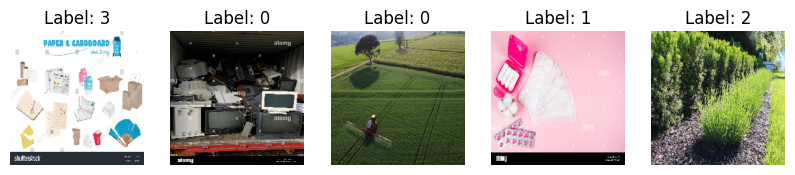

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
images, labels = next(train_generator)

# Plot the first 5 images in the batch
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {np.argmax(labels[i])}")
    plt.axis('off')
plt.show()



In [ ]:
# Prepare test data generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale, no split

# Test generator
test_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,  # No shuffling for test data
)


Found 2397 images belonging to 4 classes.


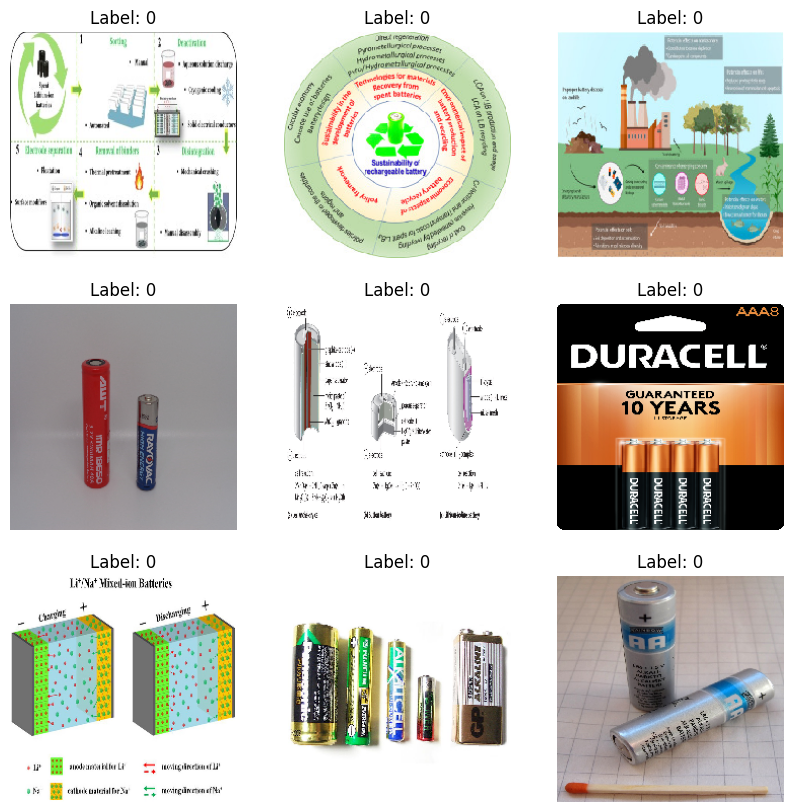

In [ ]:
# Get a batch of test images
test_images, test_labels = next(test_generator)

# Display test samples
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Label: {test_labels[i].argmax()}")
    plt.axis('off')
plt.show()


In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Step 1: Define the base directory where the original dataset is located
base_dir = '/content/drive/My Drive/DATA'  # The base directory contains 4 subdirectories: Recyclable, Organic, Non-Recyclable, Hazardous

# Step 2: Define the target directory where the processed data will be saved
target_dir = '/content/drive/My Drive/processed_data'

# Create directories for train and validation if they don't exist
train_dir = os.path.join(target_dir, 'train')
val_dir = os.path.join(target_dir, 'validation')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Step 3: Create subdirectories for each category under train and validation directories
categories = ['Recyclable', 'Organic', 'Non-Recyclable', 'Hazardous']

# Create subdirectories for each category in the train and validation directories
for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

# Step 4: Define the ImageDataGenerator for data splitting and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,  # Use 20% for validation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

# Step 5: Define the ImageDataGenerator for validation
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Step 6: Define the function to move images from source to train and validation directories
def split_data(source_dir, train_dir, val_dir):
    for category in categories:
        category_dir = os.path.join(source_dir, category)
        # Get the subfolders in each category (e.g., plastic_bottles, yard_trimmings, etc.)
        subcategories = os.listdir(category_dir)

        for subcategory in subcategories:
            subcategory_path = os.path.join(category_dir, subcategory)
            if os.path.isdir(subcategory_path):
                # Move images to the train and validation directories based on split
                for filename in os.listdir(subcategory_path):
                    src_image_path = os.path.join(subcategory_path, filename)
                    if os.path.isfile(src_image_path):
                        # Determine if the image goes to the train or validation set
                        if np.random.rand() < 0.8:
                            # Move to the training set
                            dest_path = os.path.join(train_dir, category, subcategory)
                        else:
                            # Move to the validation set
                            dest_path = os.path.join(val_dir, category, subcategory)

                        # Create subfolder if it doesn't exist
                        os.makedirs(dest_path, exist_ok=True)

                        # Move the image to the appropriate directory
                        shutil.copy(src_image_path, os.path.join(dest_path, filename))

# Step 7: Split data into train and validation
split_data(base_dir, train_dir, val_dir)


In [12]:
# Step 8: Define ImageDataGenerator for train and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
)

# Step 9: Define and compile the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Implement a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=2, min_lr=1e-6)

# Step 10: Train the model
# Add this callback to your model training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[lr_scheduler]  # Add the learning rate scheduler here
)

Found 1913 images belonging to 4 classes.
Found 484 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 280s 4s/step - accuracy: 0.3056 - loss: 5.1411 - val_accuracy: 0.3182 - val_loss: 1.3334 - learning_rate: 0.0010
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 308s 4s/step - accuracy: 0.3648 - loss: 1.3236 - val_accuracy: 0.4029 - val_loss: 1.2980 - learning_rate: 0.0010
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 276s 4s/step - accuracy: 0.3937 - loss: 1.3186 - val_accuracy: 0.3946 - val_loss: 1.3095 - learning_rate: 0.0010
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 311s 4s/step - accuracy: 0.4001 - loss: 1.2902 - val_accuracy: 0.3822 - val_loss: 1.2949 - learning_rate: 0.0010
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 273s 4s/step - accuracy: 0.4355 - loss: 1.2421 - val_accuracy: 0.4112 - val_loss: 1.3633 - learning_rate: 0.0010
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 312s 4s/step - accuracy: 0.4440 - loss: 1.2155 - val_accuracy: 0.4401 - val_loss: 1.3037 - learning_rate: 0.0010
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 333s 4s/step - accuracy: 0.4362 - loss: 1.2610 - val_acc

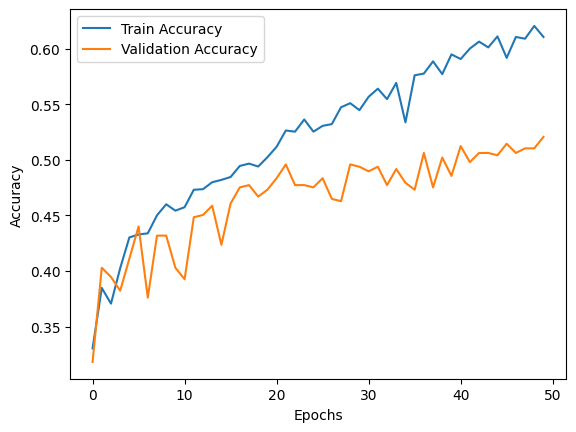

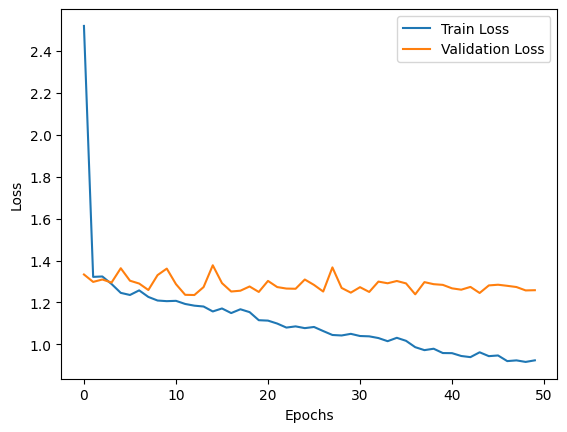

In [14]:
# Step 11: Plotting training and validation metrics after training
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import os

# Path to your test data folder and saved model
test_folder = '/content/drive/My Drive/Test Data'
model_path = '/content/drive/My Drive/my_model2.keras'  # Replace with the actual model file path

# Load the trained model
if not os.path.exists(model_path):
    print(f"Error: Model file '{model_path}' does not exist.")
else:
    model = load_model(model_path)
    print("Model loaded successfully.")

    # Check if the test folder exists
    if not os.path.exists(test_folder):
        print(f"Error: Test folder '{test_folder}' does not exist.")
    else:
        # Ensure the folder contains valid image files
        test_images = [f for f in os.listdir(test_folder) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

        if not test_images:
            print(f"Error: No valid image files found in '{test_folder}'.")
        else:
            print(f"Found {len(test_images)} test images.")

            # Iterate through each test image
            for image_name in test_images:
                img_path = os.path.join(test_folder, image_name)

                try:
                    # Load and preprocess the image
                    img = load_img(img_path, target_size=(224, 224))  # Resize image
                    img_array = img_to_array(img) / 255.0  # Normalize pixel values
                    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

                    # Predict the class
                    prediction = model.predict(img_array)
                    predicted_class = np.argmax(prediction, axis=1)

                    print(f"Image: {image_name} -> Predicted Class: {predicted_class}")
                except Exception as e:
                    print(f"Error processing image {image_name}: {e}")


Model loaded successfully.
Found 8 test images.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Image: NR (2).jpg -> Predicted Class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Image: O.jpg -> Predicted Class: [2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: NR (1).jpg -> Predicted Class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: NR.jpg -> Predicted Class: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image: non rec haz.jpg -> Predicted Class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image: 0.jpg -> Predicted Class: [3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: 00.jpg -> Predicted Class: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Image: 3.jpg -> Predicted Class: [1]


In [16]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5344 - loss: 1.1401
Validation Loss: 1.1107968091964722
Validation Accuracy: 0.5351239442825317


In [17]:
model.save('/content/drive/My Drive/my_model60,51.keras')


In [22]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('/content/drive/My Drive/my_model60,51.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp28hah0nd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_5')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  135695603897744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135693157842640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135693160422688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135693160426560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135693118398608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135693157929856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135693210178080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135693350730240: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [21]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()


Saved artifact at '/tmp/tmpdijx3es6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_5')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  135695603897744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135693157842640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135693160422688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135693160426560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135693118398608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135693157929856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135693210178080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135693350730240: TensorSpec(shape=(), dtype=tf.resource, name=None)
